In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/99-dapt-sao-ih-hotel-booking/tb_hotel_traintest.csv
/kaggle/input/99-dapt-sao-ih-hotel-booking/Case Hteis - Descritivo Variveis.pdf
/kaggle/input/99-dapt-sao-ih-hotel-booking/tb_hotel_sample_valid.csv
/kaggle/input/99-dapt-sao-ih-hotel-booking/tb_hotel_feat_valid_2.csv


# Importing Dependencies:

In [2]:
# import libraries and Dependencies:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Understanding Submission File

In [3]:
#read the submission file 

submission = pd.read_csv("/kaggle/input/99-dapt-sao-ih-hotel-booking/tb_hotel_sample_valid.csv")
submission.head()

,id_booking,is_cancelled
0,47,0
1,132,1
2,164,0
3,171,1
4,178,0


In [4]:
#Printing Columns of Submission File:
submission.columns

Index(['id_booking', 'is_cancelled'], dtype='object')

# Train Data

In [5]:
train_data = pd.read_csv("/kaggle/input/99-dapt-sao-ih-hotel-booking/tb_hotel_traintest.csv")
train_data.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,2
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,3
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.0,0,1,2015-07-03,2015-07-01,4


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           113409 non-null  object 
 1   is_cancelled                    113409 non-null  int64  
 2   lead_time                       113409 non-null  int64  
 3   stays_in_weekend_nights         113409 non-null  int64  
 4   stays_in_week_nights            113409 non-null  int64  
 5   adults                          113409 non-null  int64  
 6   children                        113406 non-null  float64
 7   babies                          113409 non-null  int64  
 8   meal                            113409 non-null  object 
 9   country                         112951 non-null  object 
 10  market_segment                  113409 non-null  object 
 11  distribution_channel            113409 non-null  object 
 12  is_repeated_gues

In [7]:
train_data.describe()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
count,113409.000000,113409.000000,113409.000000,113409.000000,113409.000000,113406.000000,113409.000000,113409.000000,113409.000000,113409.000000,113409.000000,97918.000000,6437.000000,113409.000000,113409.000000,113409.000000,113409.000000,113409.000000
mean,0.370658,104.109074,0.927907,2.500498,1.857304,0.104227,0.007980,0.031673,0.087101,0.136330,0.220917,86.459476,189.195122,2.326200,101.882431,0.062367,0.571612,59714.795969
std,0.482983,106.894825,0.998723,1.906670,0.583753,0.398976,0.098027,0.175129,0.844538,1.497662,0.649771,110.559811,131.579937,17.613897,50.626711,0.245190,0.792979,34464.577528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.400000,0.000000,0.000000,29879.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.900000,0.000000,0.000000,59708.000000
75%,1.000000,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,89584.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,119389.000000


In [8]:
train_data.columns

Index(['hotel', 'is_cancelled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'arrival_date', 'id_booking'],
      dtype='object')

In [9]:
print(len(train_data.columns))

29


# Working with "Train data"

In [10]:
# Checking for missing data

train_data.isnull().sum()

hotel                                  0
is_cancelled                           0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               3
babies                                 0
meal                                   0
country                              458
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15491
company                           106972
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_par

In [11]:
# Only choosing the numerical_features from the train_data.
#And dropping all the catgorial data

train_data = train_data.select_dtypes(include = [np.number])

In [12]:
train_data

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
0,0,342,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0,0
1,0,737,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0,1
2,0,7,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0,2
3,0,13,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0,3
4,0,14,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113404,0,23,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0,119385
113405,0,102,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2,119386
113406,0,34,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4,119387
113407,0,109,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0,119388


In [13]:
train_data.isnull().sum()

is_cancelled                           0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               3
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              15491
company                           106972
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
id_booking                             0
dtype: int64

# Filling out the missing values

In [14]:
#filling the missing values by taking the mean of all values from the features

agent_seri = train_data["agent"]
value = agent_seri.mean()

agent_seri = agent_seri.fillna(value)
agent_seri = agent_seri.astype("float64")
print(agent_seri)


0          86.459476
1          86.459476
2          86.459476
3         304.000000
4         240.000000
             ...    
113404    394.000000
113405      9.000000
113406      9.000000
113407     89.000000
113408      9.000000
Name: agent, Length: 113409, dtype: float64


In [15]:
company_seri = train_data["company"]
value2 = company_seri.mean()

company_seri = company_seri.fillna(value2)
company_seri = company_seri.astype("float64")
print(company_seri)

0         189.195122
1         189.195122
2         189.195122
3         189.195122
4         189.195122
             ...    
113404    189.195122
113405    189.195122
113406    189.195122
113407    189.195122
113408    189.195122
Name: company, Length: 113409, dtype: float64


In [16]:
children_seri3 = train_data["children"]
value = children_seri3.mean()

children_seri3 = children_seri3.fillna(value)
children_seri3 = children_seri3.astype("float64")
print(children_seri3)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
113404    0.0
113405    0.0
113406    0.0
113407    0.0
113408    0.0
Name: children, Length: 113409, dtype: float64


In [17]:
# Submitting the edited version back to train_data

train_data["agent"] = agent_seri
train_data["company"] = company_seri
train_data["children"] = children_seri3

In [18]:
train_data.isnull().sum()

is_cancelled                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
id_booking                        0
dtype: int64

In [19]:
train_data.head()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
0,0,342,0,0,2,0.0,0,0,0,0,3,86.459476,189.195122,0,0.0,0,0,0
1,0,737,0,0,2,0.0,0,0,0,0,4,86.459476,189.195122,0,0.0,0,0,1
2,0,7,0,1,1,0.0,0,0,0,0,0,86.459476,189.195122,0,75.0,0,0,2
3,0,13,0,1,1,0.0,0,0,0,0,0,304.000000,189.195122,0,75.0,0,0,3
4,0,14,0,2,2,0.0,0,0,0,0,0,240.000000,189.195122,0,98.0,0,1,4


In [20]:
train_data.columns

Index(['is_cancelled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'id_booking'],
      dtype='object')

# Understading data

In [21]:
train_data.corr()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
is_cancelled,1.000000,0.293623,-0.002294,0.025145,0.059090,0.004760,-0.031930,-0.084587,0.110220,-0.057010,-0.144461,-0.077522,-0.004529,0.054064,0.047054,-0.195209,-0.235095,-0.242906
lead_time,0.293623,1.000000,0.085733,0.164717,0.117985,-0.038135,-0.020828,-0.123345,0.086523,-0.073028,0.000672,-0.065945,0.028224,0.169820,-0.064095,-0.116434,-0.097501,0.007357
stays_in_weekend_nights,-0.002294,0.085733,1.000000,0.498585,0.090994,0.045453,0.018396,-0.086211,-0.011979,-0.042335,0.062344,0.132078,0.013634,-0.053856,0.048702,-0.017971,0.073078,-0.147532
stays_in_week_nights,0.025145,0.164717,0.498585,1.000000,0.091776,0.044485,0.020760,-0.095747,-0.014812,-0.047984,0.094459,0.170141,0.039158,-0.002157,0.064658,-0.024351,0.068052,-0.206228
adults,0.059090,0.117985,0.090994,0.091776,1.000000,0.029486,0.017588,-0.145890,-0.007252,-0.107180,-0.050699,-0.026661,0.041929,-0.007875,0.227723,0.015604,0.121615,-0.010942
children,0.004760,-0.038135,0.045453,0.044485,0.029486,1.000000,0.024727,-0.032734,-0.024719,-0.020947,0.049445,0.038894,0.003391,-0.033329,0.324495,0.057040,0.082576,-0.019096
babies,-0.031930,-0.020828,0.018396,0.020760,0.017588,0.024727,1.000000,-0.009073,-0.007437,-0.006509,0.083348,0.033262,0.002952,-0.010674,0.030089,0.036157,0.098200,-0.027875
is_repeated_guest,-0.084587,-0.123345,-0.086211,-0.095747,-0.145890,-0.032734,-0.009073,1.000000,0.081924,0.417021,0.013442,0.019758,-0.143853,-0.022196,-0.132985,0.076386,0.013954,-0.018330
previous_cancellations,0.110220,0.086523,-0.011979,-0.014812,-0.007252,-0.024719,-0.007437,0.081924,1.000000,0.151513,-0.027031,-0.010641,-0.031450,0.005821,-0.065601,-0.018569,-0.048419,-0.018213
previous_bookings_not_canceled,-0.057010,-0.073028,-0.042335,-0.047984,-0.107180,-0.020947,-0.006509,0.417021,0.151513,1.000000,0.012472,0.006347,-0.187198,-0.009519,-0.071037,0.046602,0.037052,-0.000067


<AxesSubplot: >

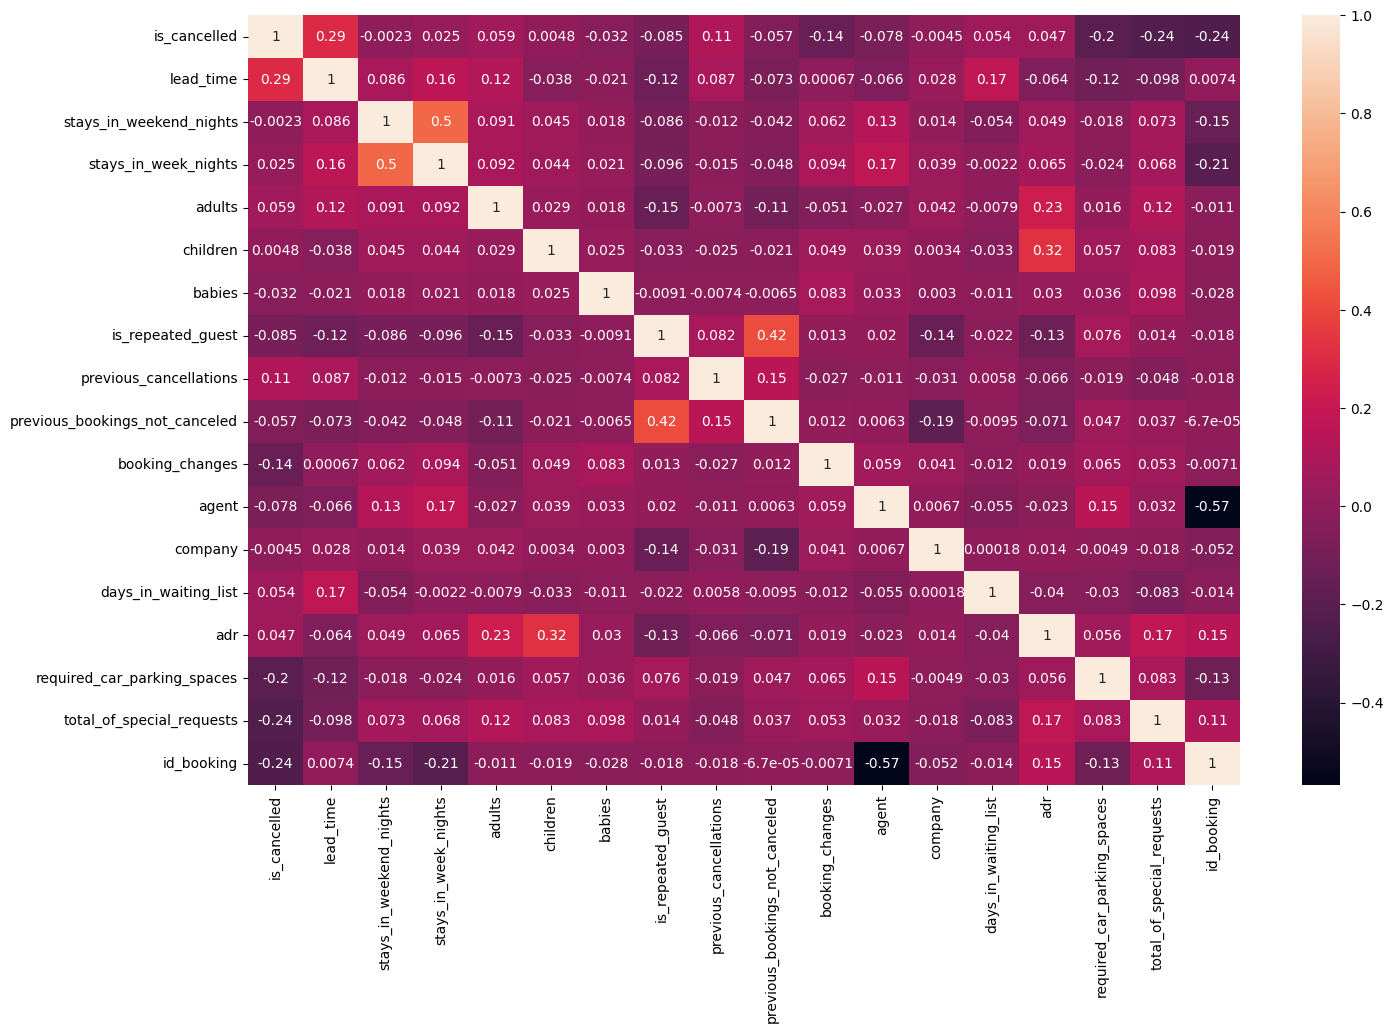

In [22]:
plt.figure(figsize = (16,10))
sns.heatmap(data = train_data.corr(), annot = True)

# Working with "Test" Data

In [23]:
# Test data

test_data = pd.read_csv("/kaggle/input/99-dapt-sao-ih-hotel-booking/tb_hotel_feat_valid_2.csv")
test_data.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,113,2,5,2,0.0,0,BB,NOR,Offline TA/TO,...,156.0,NaN,0,Transient-Party,82.88,0,2,2015-03-11,2015-07-02,47
1,Resort Hotel,5,1,0,2,0.0,0,BB,PRT,Online TA,...,240.0,NaN,0,Transient,97.00,0,0,2015-06-30,2015-07-05,132
2,Resort Hotel,81,1,3,2,2.0,0,HB,CHE,Direct,...,250.0,NaN,0,Transient,210.00,1,0,2015-04-16,2015-07-06,164
3,Resort Hotel,98,1,1,2,0.0,0,BB,USA,Online TA,...,240.0,NaN,0,Transient,87.30,1,1,2015-03-30,2015-07-06,171
4,Resort Hotel,98,1,5,2,0.0,0,HB,ESP,Online TA,...,240.0,NaN,0,Transient,117.80,1,1,2015-03-30,2015-07-06,178


In [24]:
test_data = test_data.select_dtypes(include = [np.number])

In [25]:
test_data.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'id_booking'],
      dtype='object')

Doing the same data manipulation as we done in train_data

In [26]:
test_data.isnull().sum()

lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             1
babies                               0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
agent                              849
company                           5621
days_in_waiting_list                 0
adr                                  0
required_car_parking_spaces          0
total_of_special_requests            0
id_booking                           0
dtype: int64

In [27]:
agent_seri2 = test_data["agent"]
value = agent_seri2.mean()

agent_seri2 = agent_seri2.fillna(value)
agent_seri2 = agent_seri2.astype("float64")
print(agent_seri2)


0       156.0
1       240.0
2       250.0
3       240.0
4       240.0
        ...  
5976      9.0
5977      9.0
5978      9.0
5979     14.0
5980     42.0
Name: agent, Length: 5981, dtype: float64


In [28]:
company_seri2 = test_data["company"]
value2 = company_seri2.mean()

company_seri2 = company_seri2.fillna(value2)
company_seri2 = company_seri2.astype("float64")
print(company_seri2)

0       190.547222
1       190.547222
2       190.547222
3       190.547222
4       190.547222
           ...    
5976    190.547222
5977    190.547222
5978    190.547222
5979    190.547222
5980    190.547222
Name: company, Length: 5981, dtype: float64


In [29]:
children_seri4 = test_data["children"]
value = children_seri4.mean()

children_seri4 = children_seri4.fillna(value)
children_seri4 = children_seri4.astype("float64")
print(children_seri4)

0       0.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
5976    0.0
5977    0.0
5978    0.0
5979    0.0
5980    0.0
Name: children, Length: 5981, dtype: float64


In [30]:
test_data["agent"] = agent_seri2
test_data["company"] = company_seri2
test_data["children"] = children_seri4

In [31]:
test_data.isnull().sum()

lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
id_booking                        0
dtype: int64

In [32]:
train_data

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
0,0,342,0,0,2,0.0,0,0,0,0,3,86.459476,189.195122,0,0.00,0,0,0
1,0,737,0,0,2,0.0,0,0,0,0,4,86.459476,189.195122,0,0.00,0,0,1
2,0,7,0,1,1,0.0,0,0,0,0,0,86.459476,189.195122,0,75.00,0,0,2
3,0,13,0,1,1,0.0,0,0,0,0,0,304.000000,189.195122,0,75.00,0,0,3
4,0,14,0,2,2,0.0,0,0,0,0,0,240.000000,189.195122,0,98.00,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113404,0,23,2,5,2,0.0,0,0,0,0,0,394.000000,189.195122,0,96.14,0,0,119385
113405,0,102,2,5,3,0.0,0,0,0,0,0,9.000000,189.195122,0,225.43,0,2,119386
113406,0,34,2,5,2,0.0,0,0,0,0,0,9.000000,189.195122,0,157.71,0,4,119387
113407,0,109,2,5,2,0.0,0,0,0,0,0,89.000000,189.195122,0,104.40,0,0,119388


In [33]:
test_data

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
0,113,2,5,2,0.0,0,0,0,0,0,156.0,190.547222,0,82.88,0,2,47
1,5,1,0,2,0.0,0,0,0,0,0,240.0,190.547222,0,97.00,0,0,132
2,81,1,3,2,2.0,0,0,0,0,0,250.0,190.547222,0,210.00,1,0,164
3,98,1,1,2,0.0,0,0,0,0,0,240.0,190.547222,0,87.30,1,1,171
4,98,1,5,2,0.0,0,0,0,0,0,240.0,190.547222,0,117.80,1,1,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,26,0,4,3,0.0,0,0,0,0,0,9.0,190.547222,0,207.25,0,0,119299
5977,31,0,3,2,0.0,0,0,0,0,0,9.0,190.547222,0,152.67,0,1,119344
5978,194,0,3,2,0.0,0,0,0,0,0,9.0,190.547222,0,99.00,0,0,119345
5979,111,1,5,2,0.0,0,0,0,0,0,14.0,190.547222,0,135.00,0,1,119356


# Deploying Model

In [34]:
X_train = train_data.drop('is_cancelled', axis=1)
y_train = train_data['is_cancelled']

In [35]:
n_estimators = 600
max_depth = 40
min_samples_split = 10


In [36]:
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=600)

In [37]:
test_data = test_data[X_train.columns]

In [38]:
predictions = rf.predict(test_data)


# Checking Accuracy

In [39]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [40]:
n_estimators = 600
max_depth = 40
min_samples_split = 10


In [41]:
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rf.fit(X_train_split, y_train_split)

RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=600)

In [42]:
val_predictions = rf.predict(X_val_split)

In [43]:
accuracy = f1_score(y_val_split, val_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9657335621707996


# Approach to find the best Hyper Parameters

**Tried it, but taking hours, need high computational power for the approaches, so I leaved them**

In [44]:
#from itertools import product

#best_accuracy = 0.0
#best_parameters = {}

#n_estimators_values = [100, 200, 300, 400, 500]
#max_depth_values = [10,20,25,30,35,40,45, 50]
#min_samples_split_values = [10, 20,25,30,35,40,45, 50]

#for n_estimators, max_depth, min_samples_split in product(n_estimators_values, max_depth_values, min_samples_split_values):
    #rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    #rf.fit(X_train_split, y_train_split)
    
    #val_predictions = rf.predict(X_val_split)
    #accuracy = accuracy_score(y_val_split, val_predictions)
    
    #if accuracy > best_accuracy:
        #best_accuracy = accuracy
        #best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

#print("Best Parameters:", best_parameters)
#print("Best Validation Accuracy:", best_accuracy)

In [45]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
    #'n_estimators': [100, 200, 300, 400, 500],
    #'max_depth': [10, 20, 30, 40, 50],
    #'min_samples_split': [10, 20, 30, 40, 50]
#}

#rf = RandomForestClassifier()

#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X_train_split, y_train_split)

#best_params = grid_search.best_params_
#best_accuracy = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Validation Accuracy:", best_accuracy)


In [46]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import f1_score

#param_grid = {
    #'n_estimators': [100, 200, 300, 400, 500],
    #'max_depth': [10, 20, 30, 40, 50],
    #'min_samples_split': [10, 20, 30, 40, 50]
#}

#rf = RandomForestClassifier()

#random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='f1', cv=5, n_iter=10)
#random_search.fit(X_train_split, y_train_split)

#best_params = random_search.best_params_
#best_f1_score = random_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Validation F1 Score:", best_f1_score)


# Checking for indexes

In [47]:
data = np.random.rand(5980) 
index = pd.RangeIndex(start=0, stop=5981)  

# Check lengths
data_length = data.shape[0]
index_length = len(index)

if data_length == index_length:
    print("Lengths match!")
else:
    print("Lengths do not match.")

# Handle the length mismatch
if data_length < index_length:
    
    index = index[:data_length]
else:
   
    data = data[:index_length]


print("Data length:", len(data))
print("Index length:", len(index))

Lengths do not match.
Data length: 5980
Index length: 5980


Creation of "Submission" file

In [48]:
submission['is_cancelled'] = predictions
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,id_booking,is_cancelled
0,47,0
1,132,0
2,164,0
3,171,0
4,178,0
...,...,...
5976,119299,0
5977,119344,0
5978,119345,0
5979,119356,0


> ***Hope this notebook helps you!!, your support motivate me to make such note-books**

> With regads
> your fellow kaggler 